In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('ipl-matches.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [5]:
##give the info of only categeriol data
df.describe(exclude=np.number)

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
count,899,950,950,950,950,950,950,950,950,946,946,950,19,946,950,950,950,950
unique,33,706,15,80,18,18,49,18,2,2,18,4,1,262,932,937,58,60
top,Mumbai,2014-05-07,2013,43,Royal Challengers Bangalore,Mumbai Indians,Eden Gardens,Mumbai Indians,field,N,Mumbai Indians,Wickets,D/L,AB de Villiers,"['AC Gilchrist', 'VVS Laxman', 'HH Gibbs', 'A ...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa...",AK Chaudhary,S Ravi
freq,159,2,76,15,126,119,77,123,599,932,131,509,19,25,2,2,95,83


In [6]:
df.isna().sum()


ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [8]:
df.shape

(950, 20)

In [15]:
##drop null from winning TEam
df=df.dropna(subset=['WinningTeam'])
df.shape

(946, 20)

In [18]:
##name of unique team
df.Team1.unique()


array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [20]:
##
df.nunique()

ID                 946
City                33
Date               704
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                3
Margin              94
method               1
Player_of_Match    262
Team1Players       928
Team2Players       933
Umpire1             58
Umpire2             60
dtype: int64

In [26]:
d={'Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings','Rising Pune Supergiants':'Pune Warriors','Rising Pune Supergiant':'Pune Warriors','Gujarat Titans':'Gujarat Lions'}
df=df.replace(d.keys(),d.values())
df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Lions', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [46]:
teams=df.Team1.unique()
L=[]
for team in teams:
    played=df[(df.Team1==team)|(df.Team2==team)].shape[0]
    win=df[df.WinningTeam==team].shape[0]
    home_play=df[df.Team1==team].shape[0]
    home_win=df[(df.WinningTeam==team)&(df.Team1==team)].shape[0]
    away_play=df[df.Team2==team].shape[0]
    away_win=df[(df.Team2==team)&(df.WinningTeam==team)].shape[0]
    L.append([team,played,win/played*100,home_win/home_play*100,away_win/away_play*100])
new_df=pd.DataFrame(L,columns=['team','play','win%','home%','away%'])
print(new_df)

                           team  play       win%      home%      away%
0              Rajasthan Royals   190  50.526316  55.056180  46.534653
1   Royal Challengers Bangalore   223  48.878924  49.593496  48.000000
2           Sunrisers Hyderabad   152  49.342105  52.173913  46.987952
3                Delhi Capitals   222  46.396396  46.902655  45.871560
4           Chennai Super Kings   208  58.173077  58.558559  57.731959
5                 Gujarat Lions    46  54.347826  39.130435  69.565217
6          Lucknow Super Giants    15  60.000000  87.500000  28.571429
7         Kolkata Knight Riders   223  51.121076  53.333333  49.152542
8                  Punjab Kings   218  46.330275  45.454545  47.222222
9                Mumbai Indians   231  56.709957  58.035714  55.462185
10                Pune Warriors    75  36.000000  35.135135  36.842105
11              Deccan Chargers    75  38.666667  33.333333  44.444444
12         Kochi Tuskers Kerala    14  42.857143  42.857143  42.857143


In [45]:
##2022 ni season nu point table
##jene match rami na hpy e na aava joie
df2022=df[df.Season=='2022']
L=[]
teams=df2022.Team1.unique()
for team in teams:
    play=df2022[(df2022.Team1==team)|(df2022.Team2==team)].shape[0]
    win=df2022[df2022.WinningTeam==team].shape[0]
    L.append([team,play,win,win*2])
new=pd.DataFrame(L,columns=['team','played','win','points'])
    
print(new)    

                          team  played  win  points
0             Rajasthan Royals      17   10      20
1  Royal Challengers Bangalore      16    9      18
2          Sunrisers Hyderabad      14    6      12
3               Delhi Capitals      14    7      14
4          Chennai Super Kings      14    4       8
5                Gujarat Lions      16   12      24
6         Lucknow Super Giants      15    9      18
7        Kolkata Knight Riders      14    6      12
8                 Punjab Kings      14    7      14
9               Mumbai Indians      14    4       8


In [47]:
##je team toss kare che and win thaay eni winning probability in IPL
df[df.WinningTeam==df.TossWinner].shape[0]/df.shape[0]

0.5169133192389006

In [64]:
##create the data frame using dai
##display the last five row or last seven row
##give the basic info of 
##dive the statical analysic of categarical and numerical column
##how many dta missing in given data frame
##cr ni column ne feel karo using median
##htr ni column nw ne mode the feel karo
##jetla data null che ene drop karo
##if duplicate hooy tooj drop karvanu na hooy toh nai karvanu
##grapi repre for the outlier for cr column
## remove the ouitlier in cr column
##give the corelationship in given data frame
##Uper walu in graph

##gender ma hdl,cr par visual karvo che male and female ma

In [51]:
df=pd.read_csv("diabetes_unclean.csv")
print(df)

       ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  \
0     502      17975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   
1     735      34221      M  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   
2     420      47975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   
3     680      87656      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   
4     504      34223      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   
...   ...        ...    ...   ...   ...   ...    ...   ...  ...  ...  ...   
1004  191     454316      M  55.0   NaN  62.0    6.8   5.3  2.0  1.0  3.5   
1005  192     454316      M  55.0   4.8  88.0    NaN   5.7  4.0  0.9  3.3   
1006  193     454316      M  62.0   6.3  82.0    6.7   5.3  2.0  1.0  3.5   
1007  194     454316      F  57.0   4.1  70.0    9.3   5.3  3.3  1.0  1.4   
1008  195       4543      f  55.0   4.1  34.0   13.9   5.4  1.6  1.6  3.1   

      VLDL   BMI CLASS  
0      0.5  24.0     N  
1      0.6  23.0     N  


In [52]:
df.tail(7)


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1002,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1008,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [54]:
df.describe(include="all")


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1009.000000,1.009000e+03,1009,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000,1009
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840
mean,339.161546,2.717448e+05,NaN,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911,NaN
std,239.738169,3.365681e+06,NaN,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246,NaN
min,1.000000,1.230000e+02,NaN,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,127.000000,2.406500e+04,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,296.000000,3.439900e+04,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,548.000000,4.539000e+04,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


In [55]:
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [59]:
df['Cr']=df['Cr'].fillna(df.Cr.median())
df['HDL']=df['HDL'].fillna(df.HDL.mode()[0])
df.isna()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1007,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           0
HbA1c        3
Chol         2
TG           2
HDL          0
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe08ac3490>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe08ac3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe08ac3130>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe08ad0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe08ad05b0>],
 'means': []}

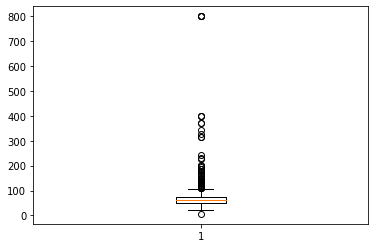

In [61]:
##10
import matplotlib.pyplot as plt
plt.boxplot(df["Cr"])

In [67]:
##11
Q1=df.Cr.quantile(0.25)
Q3=df.Cr.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1+1.5*IQR
df=df[(df.Cr<=UL)&(df.Cr>=LL)]
print(df)

       ID  No_Pation Gender   AGE  Urea     Cr  HbA1c  Chol   TG  HDL  LDL  \
83    143      45410      M  63.0   6.6  106.0    4.3   4.8  1.7  1.1  3.0   
93    165      45412      F  77.0   5.0  106.0    5.4   3.9  2.1  1.2  4.2   
96    180     454316      F  54.0   6.3  106.0    5.6   4.3  2.0  1.3  2.2   
99    186     454316      M  77.0   5.0  106.0    5.4   0.0  2.8  0.8  1.8   
154   152      45378      M  39.0   5.0  106.0    6.4   3.7  2.0  0.8  2.1   
224    31      34252      M  50.0   2.6  106.0    4.0   6.3  4.4  1.0  3.6   
952   128      45385      M  50.0   5.0  106.0    6.9   7.3  4.0  1.1  NaN   
964   158      45398      M  54.0   6.3  106.0    8.6   5.5  2.9  1.1  1.3   
967   162      45370      M  30.0   4.6  106.0    8.1   6.8  3.2  0.7  3.6   
968   163      45450      M  64.0   8.8  106.0    8.2   3.8  3.0  0.9  1.7   
983   185     454316      M  64.0   8.8  106.0    8.5   NaN  2.1  1.2  4.0   
1000  185     454316      M  64.0   8.8  106.0    8.5   5.9  2.1

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe08b8cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe08b99250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe08b8c7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe08b99910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe08b99c70>],
 'means': []}

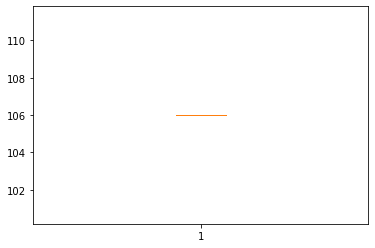

In [68]:
##12
plt.boxplot(df['Cr'])

In [70]:
##13
df.corr()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.548947,0.316271,0.654503,NaN,0.517971,-0.438511,-0.706513,0.112855,-0.144402,-0.618263,0.180924
No_Pation,0.548947,1.000000,0.401676,0.447747,NaN,0.155123,-0.435331,-0.390498,0.351756,0.097012,-0.310976,0.275360
AGE,0.316271,0.401676,1.000000,0.358182,NaN,-0.182470,-0.604610,-0.324740,0.420321,0.060924,-0.328597,0.236305
Urea,0.654503,0.447747,0.358182,1.000000,NaN,0.631371,-0.091156,-0.539068,0.368258,-0.024450,-0.182451,0.699929
Cr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HbA1c,0.517971,0.155123,-0.182470,0.631371,NaN,1.000000,0.272897,-0.058235,-0.036933,-0.068289,0.210481,0.619836
Chol,-0.438511,-0.435331,-0.604610,-0.091156,NaN,0.272897,1.000000,0.408204,0.230325,0.472378,0.659120,0.270080
TG,-0.706513,-0.390498,-0.324740,-0.539068,NaN,-0.058235,0.408204,1.000000,-0.319132,-0.053740,0.731096,-0.065645
HDL,0.112855,0.351756,0.420321,0.368258,NaN,-0.036933,0.230325,-0.319132,1.000000,0.299120,-0.011040,0.278111
LDL,-0.144402,0.097012,0.060924,-0.024450,NaN,-0.068289,0.472378,-0.053740,0.299120,1.000000,0.395581,0.434718


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 106.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 106.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 106.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='No_Pation', ylabel='ID'>,
        <AxesSubplot:xlabel='AGE', ylabel='ID'>,
        <AxesSubplot:xlabel='Urea', ylabel='ID'>,
        <AxesSubplot:xlabel='Cr', ylabel='ID'>,
        <AxesSubplot:xlabel='HbA1c', ylabel='ID'>,
        <AxesSubplot:xlabel='Chol', ylabel='ID'>,
        <AxesSubplot:xlabel='TG', ylabel='ID'>,
        <AxesSubplot:xlabel='HDL', ylabel='ID'>,
        <AxesSubplot:xlabel='LDL', ylabel='ID'>,
        <AxesSubplot:xlabel='VLDL', ylabel='ID'>,
        <AxesSubplot:xlabel='BMI', ylabel='ID'>],
       [<AxesSubplot:xlabel='ID', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='No_Pation', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='AGE', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='Urea', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='Cr', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='HbA1c', ylabel='No_Pation'>,
        <AxesSubplot:xlabel='Chol', ylabel='No_Pation'>,
   

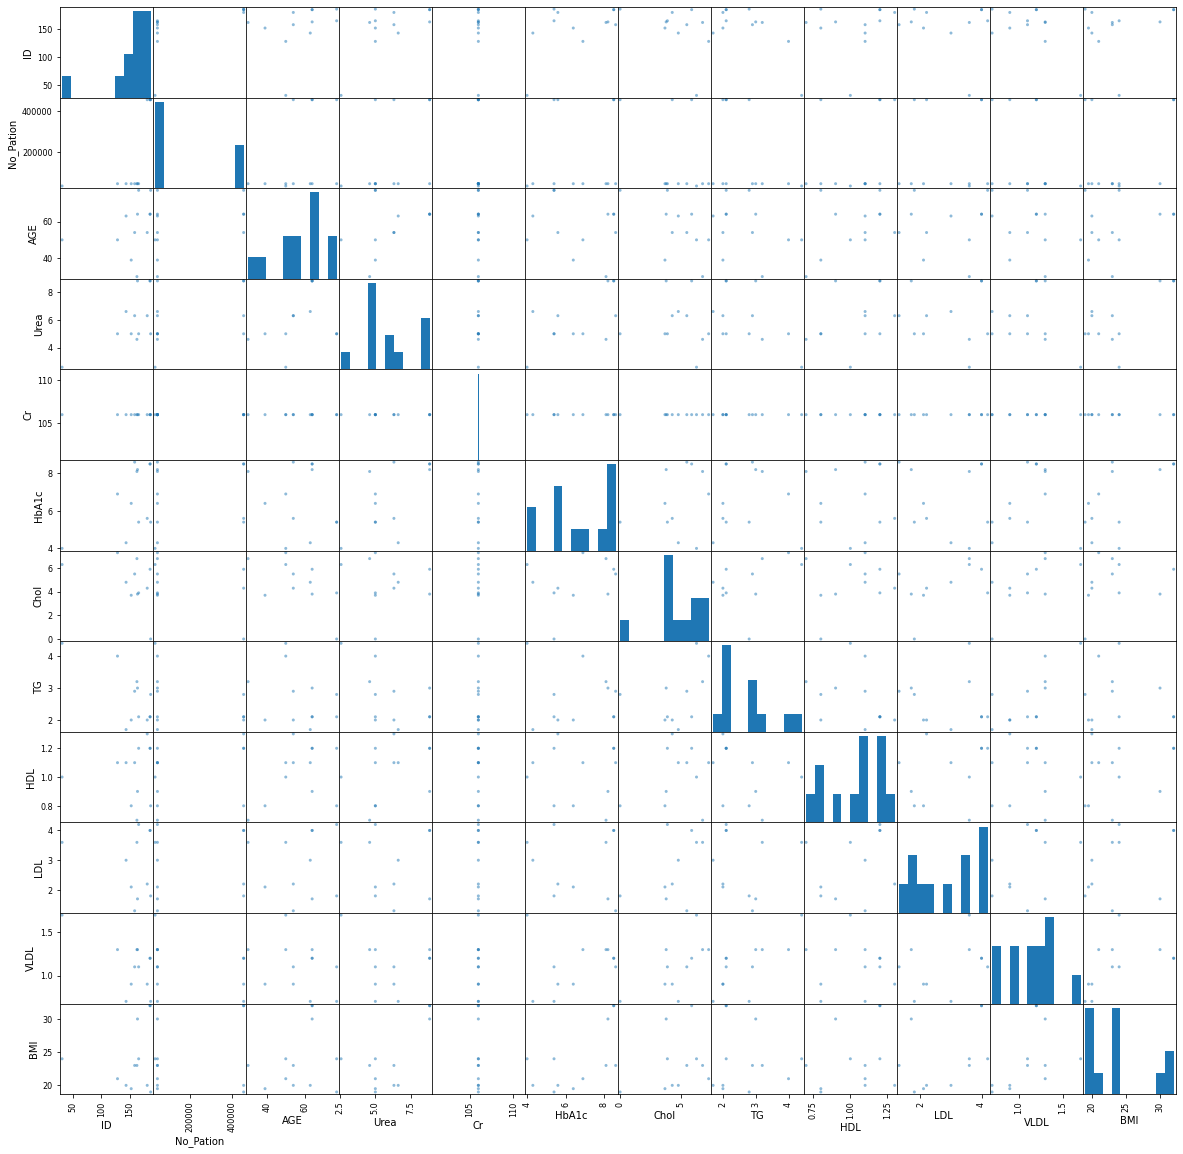

In [71]:
##14
pd.plotting.scatter_matrix(df,figsize=(20,20))

<AxesSubplot:>

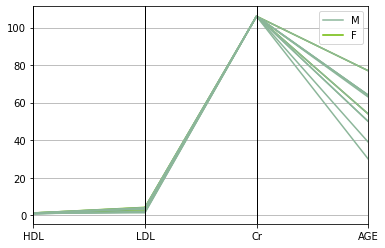

In [79]:
pd.plotting.parallel_coordinates(df,'Gender',cols=['HDL','LDL','Cr',"AGE"])


In [74]:
##16
pd.crosstab(df['Gender'],df['CLASS'])

CLASS,N,P,Y,Y
Gender,,,,
F,2,0,0,0
M,2,1,6,1


In [75]:
df['Gender']=df['Gender'].replace('f','F')